In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction
import matplotlib as mpl

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_pickle("../../data/interim/02_outliers_removed_chauvenets.pkl")

In [ ]:
predictor_columns = list(df.columns[:6])

In [ ]:
mpl.style.use("fivethirtyeight")
mpl.rcParams["figure.figsize"] = (20,5)
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["lines.linewidth"] = 2

<AxesSubplot: xlabel='epoch (ms)'>

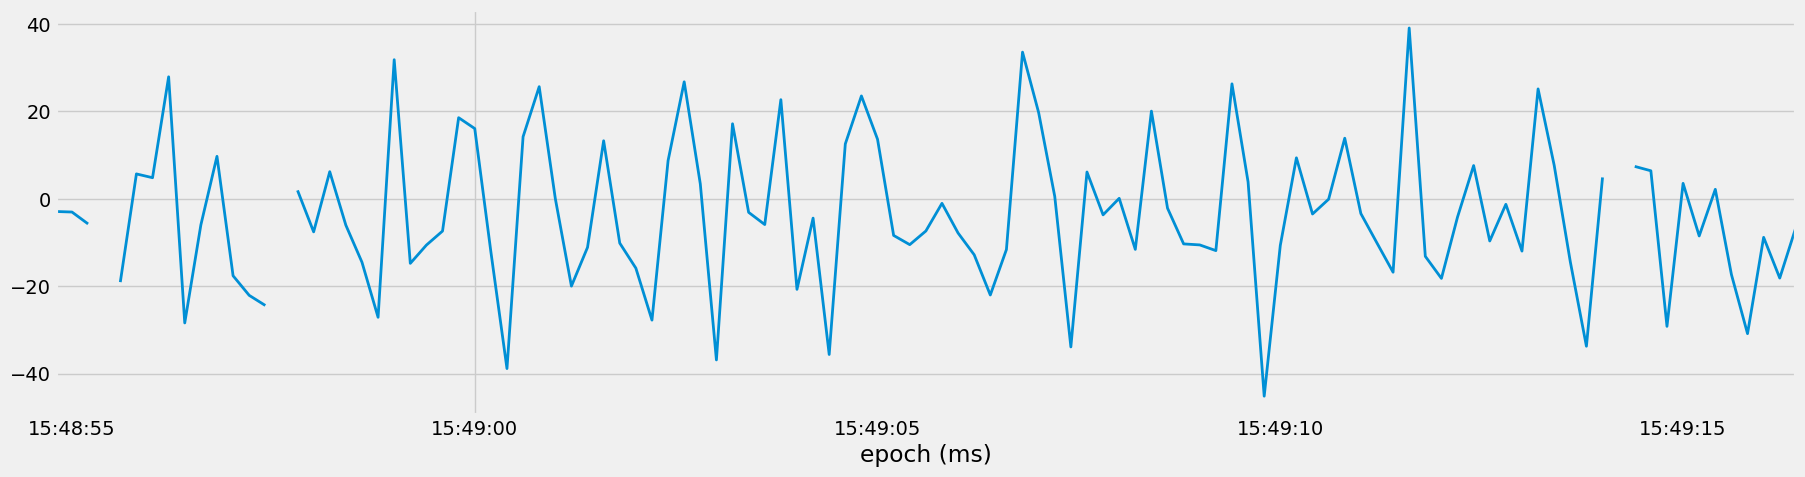

In [ ]:
subset = df[df["set"] == 35]

subset = df[df["set"] == 35]["gyr_y"]
subset.plot()

In [ ]:
for col in predictor_columns:
    df[col] = df[col].interpolate()

<AxesSubplot: xlabel='epoch (ms)'>

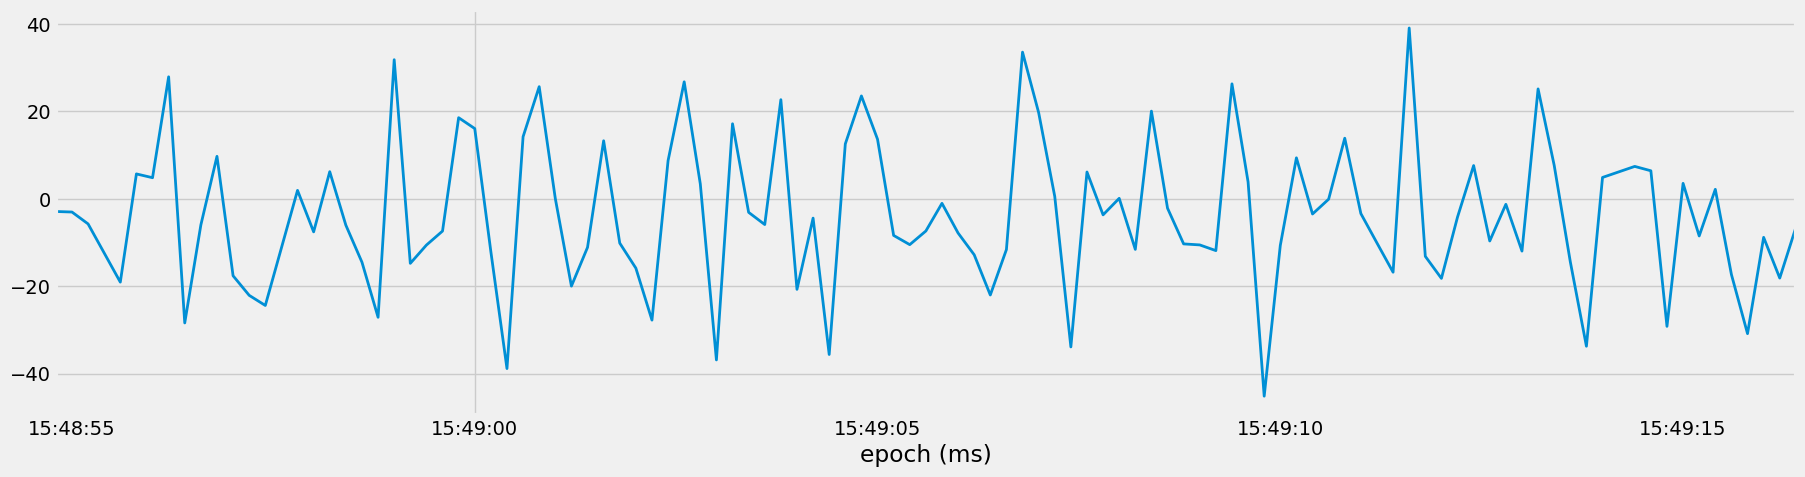

In [ ]:
subset = df[df["set"] == 35]["gyr_y"]
subset.plot()

<AxesSubplot: xlabel='epoch (ms)'>

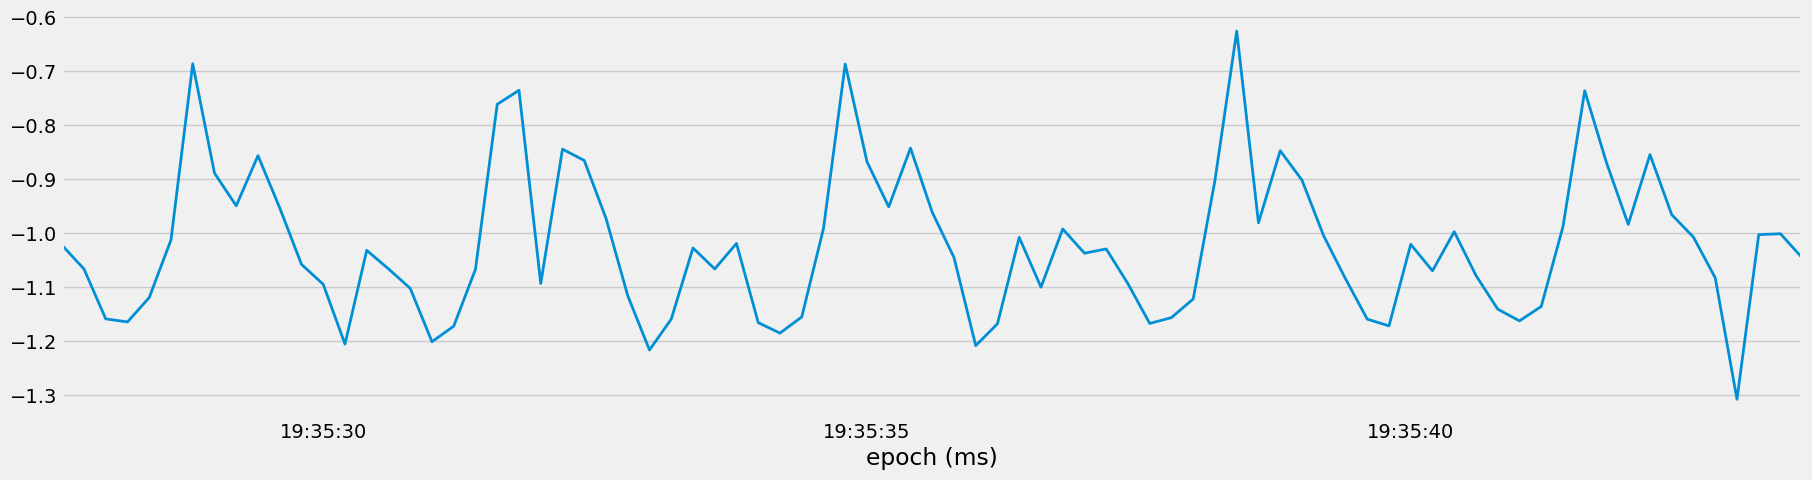

In [ ]:
df[df["set"] == 5]["acc_y"].plot()

In [ ]:
duration = df[ df["set"] == 1 ].index[-1] - df[df["set"] == 1].index[0]

In [ ]:
duration.seconds

16

In [ ]:
for s in df["set"].unique():
    start = df[df["set"] == s].index[0]
    stop = df[df["set"] == s].index[-1]
    duration = stop - start
    
    df.loc[(df["set"] == s), "duration"] = duration.seconds

In [ ]:
duration_df = df.groupby(["category"])["duration"].mean()

In [ ]:
duration_df.iloc[0] / 5     # No. of repititions
duration_df.iloc[1] / 10

2.4942528735632186

<AxesSubplot: xlabel='epoch (ms)'>

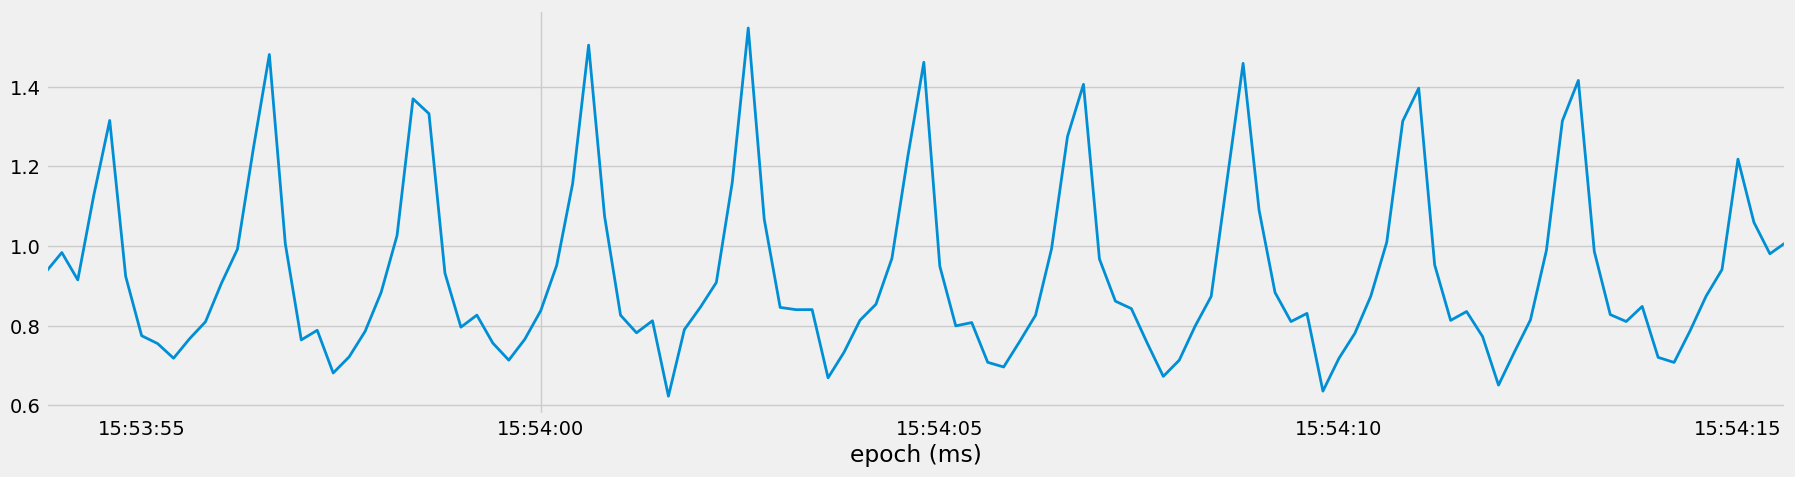

In [ ]:
df[df["set"] == 15]["acc_y"].plot()

In [ ]:
df_lowpass = df.copy()

In [ ]:
LowPass = LowPassFilter()

In [ ]:
fs = 1000 / 200
cutoff = 1.3

In [ ]:
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)

In [ ]:
subset = df_lowpass[df_lowpass["set"] == 45]
print(subset["label"][0])

ohp


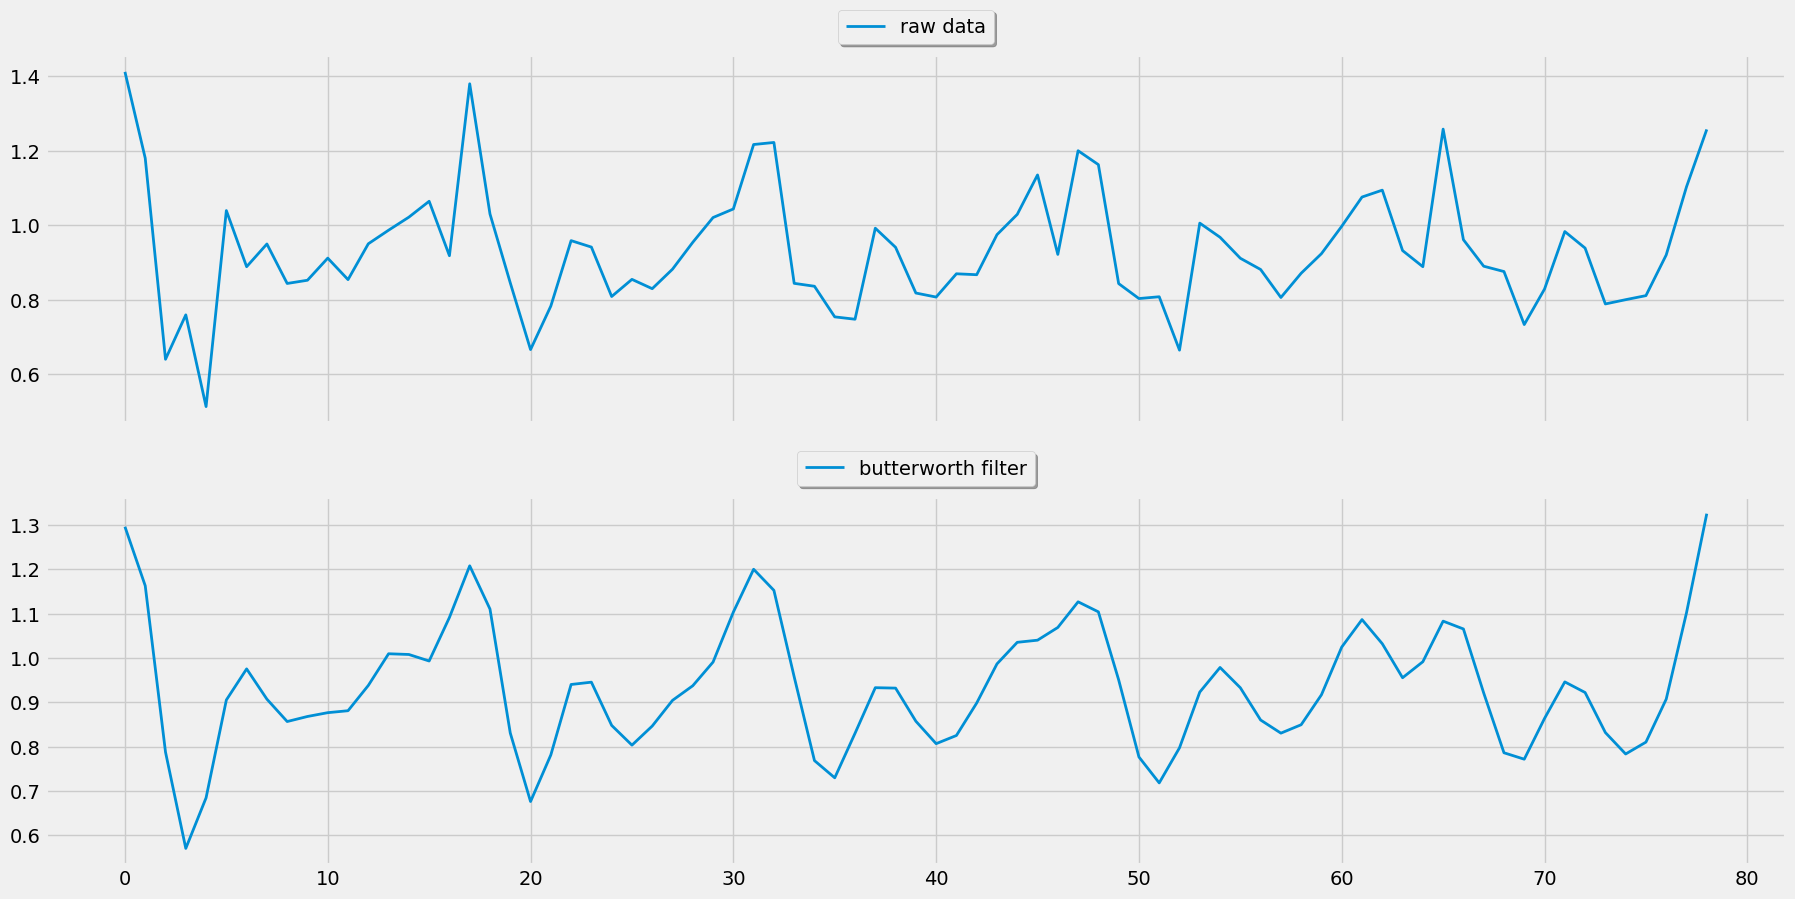

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)

In [ ]:
df_lowpass = df.copy()
fs = 1000 / 200
cutoff = 1.3

In [ ]:
for col in predictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass, col, fs, cutoff, order=5)
    df_lowpass[col] = df_lowpass[col+"_lowpass"]
    del df_lowpass[col+"_lowpass"]

In [ ]:
df_pca = df_lowpass.copy()
PCA = PrincipalComponentAnalysis()

In [ ]:
pc_values = PCA.determine_pc_explained_variance(df_pca, predictor_columns)

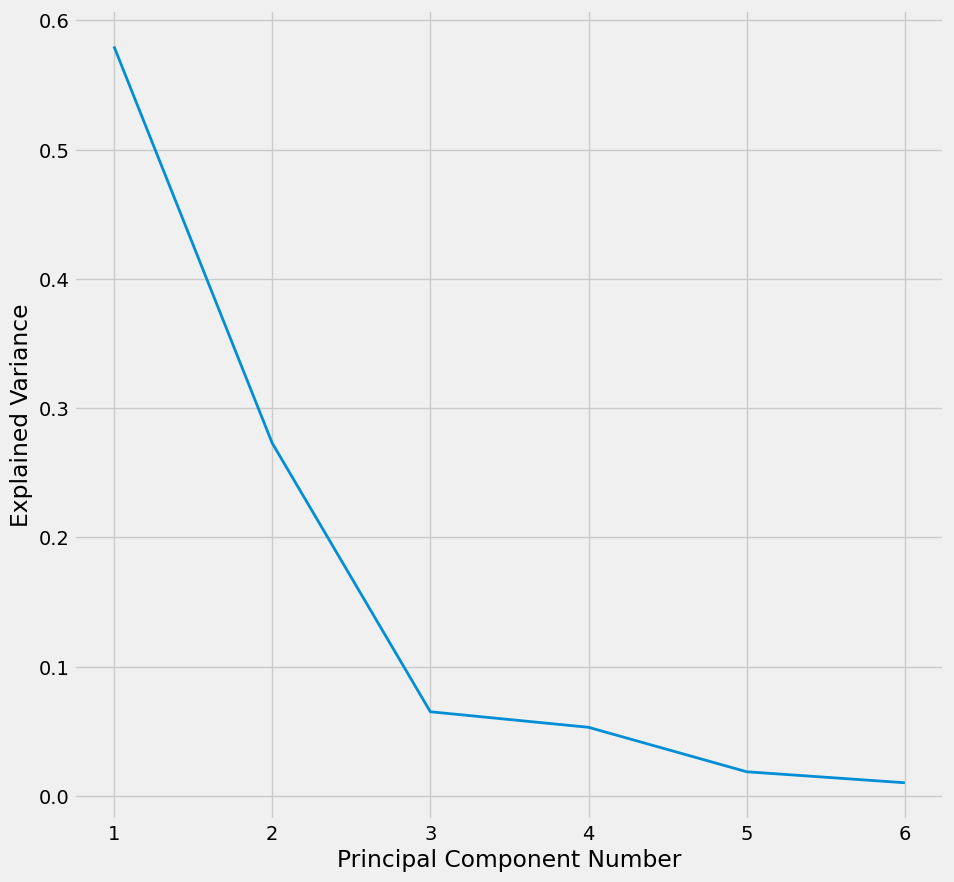

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(1,len(predictor_columns)+1), pc_values,)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance")
plt.show()

In [ ]:
df_pca = PCA.apply_pca(df_pca, predictor_columns, 3)

In [ ]:
subset = df_pca[df_pca["set"] == 22]

<AxesSubplot: xlabel='epoch (ms)'>

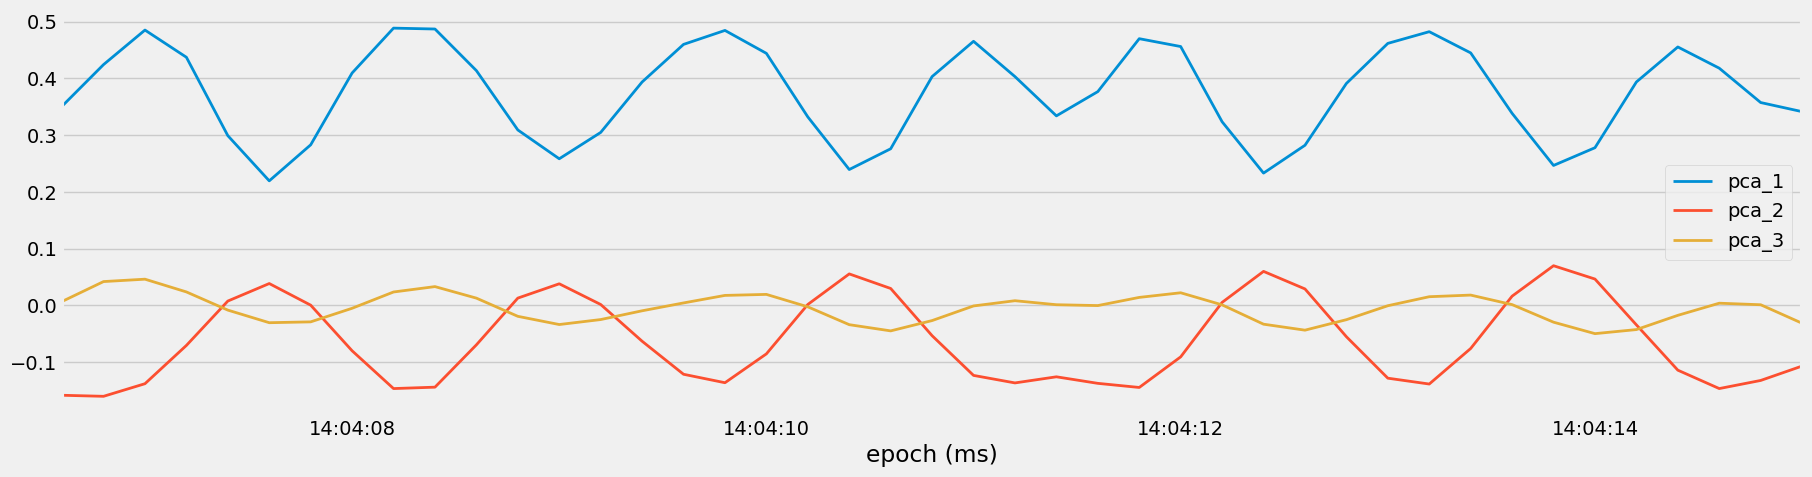

In [ ]:
subset[["pca_1", "pca_2", "pca_3"]].plot()

In [ ]:
df_squared = df_pca.copy()

In [ ]:
acc_r = (df_squared["acc_x"]**2) + (df_squared["acc_y"]**2) + (df_squared["acc_z"]**2)

In [ ]:
gyr_r = (df_squared["gyr_x"]**2) + (df_squared["gyr_y"]**2) + (df_squared["gyr_z"]**2)

In [ ]:
df_squared["acc_r"] = np.sqrt(acc_r)

In [ ]:
df_squared["gyr_r"] = np.sqrt(gyr_r)

In [ ]:
subset = df_squared[df_squared["set"] == 22]

array([<AxesSubplot: xlabel='epoch (ms)'>,
       <AxesSubplot: xlabel='epoch (ms)'>], dtype=object)

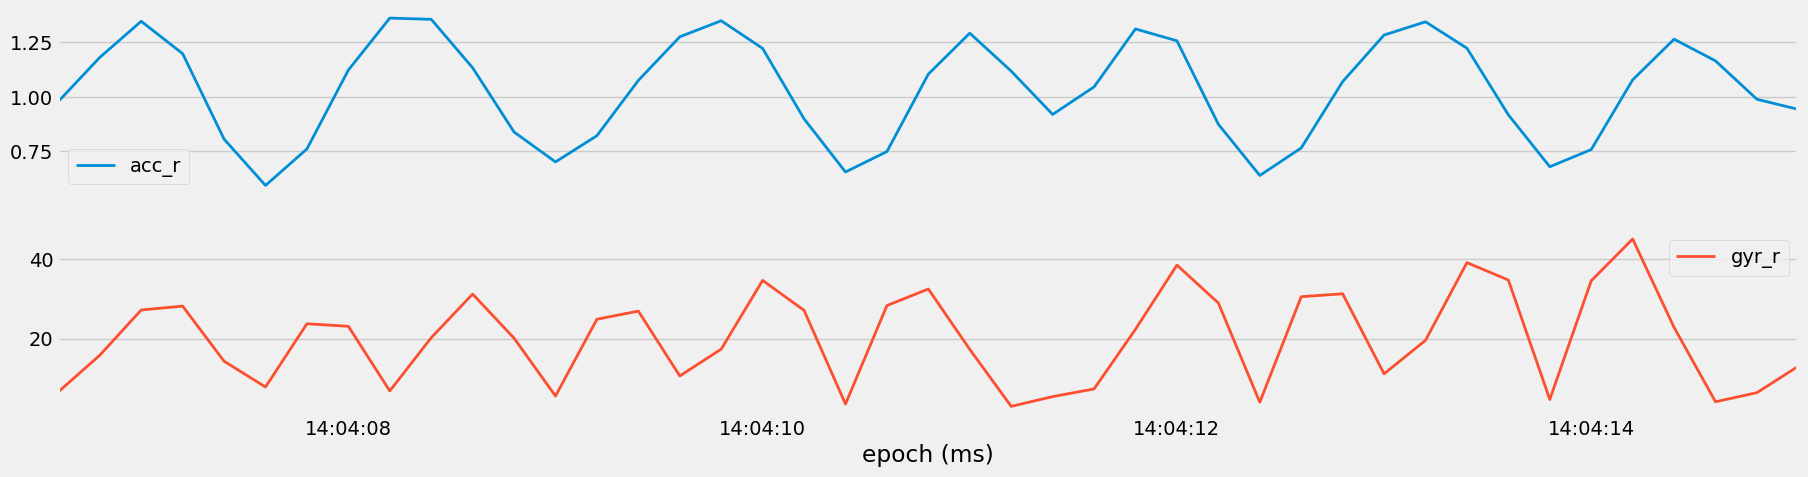

In [ ]:
subset[["acc_r","gyr_r"]].plot(subplots=True)

In [ ]:
df_temporal = df_squared.copy()

In [ ]:
NumAbs = NumericalAbstraction()

In [ ]:
predictor_columns = predictor_columns + ["acc_r","gyr_r"]

In [ ]:
predictor_columns = list(df.columns[:6])

In [ ]:
predictor_columns

['acc_y', 'acc_z', 'acc_x', 'gyr_x', 'gyr_y', 'gyr_z']

In [ ]:
predictor_columns = predictor_columns + ["acc_r","gyr_r"]

In [ ]:
predictor_columns

['acc_y', 'acc_z', 'acc_x', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_r', 'gyr_r']

In [ ]:
ws = int(1000 / 200)

In [ ]:
df_temporal

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,-0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,-0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,-0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,-0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,-0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,0.368098,-0.153153,-0.058772,1.047919,2.329568


In [ ]:
for col in predictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "std")

In [ ]:
df_temporal

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,30,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328


In [ ]:
predictor_columns

['acc_y', 'acc_z', 'acc_x', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_r', 'gyr_r']

In [ ]:
df_temporal_list = []

In [ ]:
for s in df_temporal["set"].unique():
    
    subset = df_temporal[df_temporal["set"] == s].copy()
    
    for col in predictor_columns:
        subset = NumAbs.abstract_numerical(subset, [col], ws, "mean")
        subset = NumAbs.abstract_numerical(subset, [col], ws, "std")
    
    df_temporal_list.append(subset)

In [ ]:
df_temporal = pd.concat(df_temporal_list)

In [ ]:
df_temporal

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,30,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328


In [ ]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_y                 9009 non-null   float64
 1   acc_z                 9009 non-null   float64
 2   acc_x                 9009 non-null   float64
 3   gyr_x                 9009 non-null   float64
 4   gyr_y                 9009 non-null   float64
 5   gyr_z                 9009 non-null   float64
 6   participant           9009 non-null   object 
 7   label                 9009 non-null   object 
 8   category              9009 non-null   object 
 9   set                   9009 non-null   int32  
 10  duration              9009 non-null   float64
 11  pca_1                 9009 non-null   float64
 12  pca_2                 9009 non-null   float64
 13  pca_3                 9009 non-null   float64
 14  acc_r                 

In [ ]:
df_squared.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_y        9009 non-null   float64
 1   acc_z        9009 non-null   float64
 2   acc_x        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
 10  duration     9009 non-null   float64
 11  pca_1        9009 non-null   float64
 12  pca_2        9009 non-null   float64
 13  pca_3        9009 non-null   float64
 14  acc_r        9009 non-null   float64
 15  gyr_r        9009 non-null   float64
dtypes: float64(12), int32(1), object(3)
memory usage: 1.1+ MB


In [ ]:
subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]]

,acc_y,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5
epoch (ms),,,
2019-01-20 17:33:08.400,-1.011955,NaN,NaN
2019-01-20 17:33:08.600,-1.005772,NaN,NaN
2019-01-20 17:33:08.800,-1.067709,NaN,NaN
2019-01-20 17:33:09.000,-1.051107,NaN,NaN
2019-01-20 17:33:09.200,-0.948360,-1.016980,0.041467
...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-1.080026,0.122536
2019-01-20 17:33:27.200,-1.053448,-1.100293,0.107114
2019-01-20 17:33:27.400,-1.044737,-1.057379,0.072055


<AxesSubplot: xlabel='epoch (ms)'>

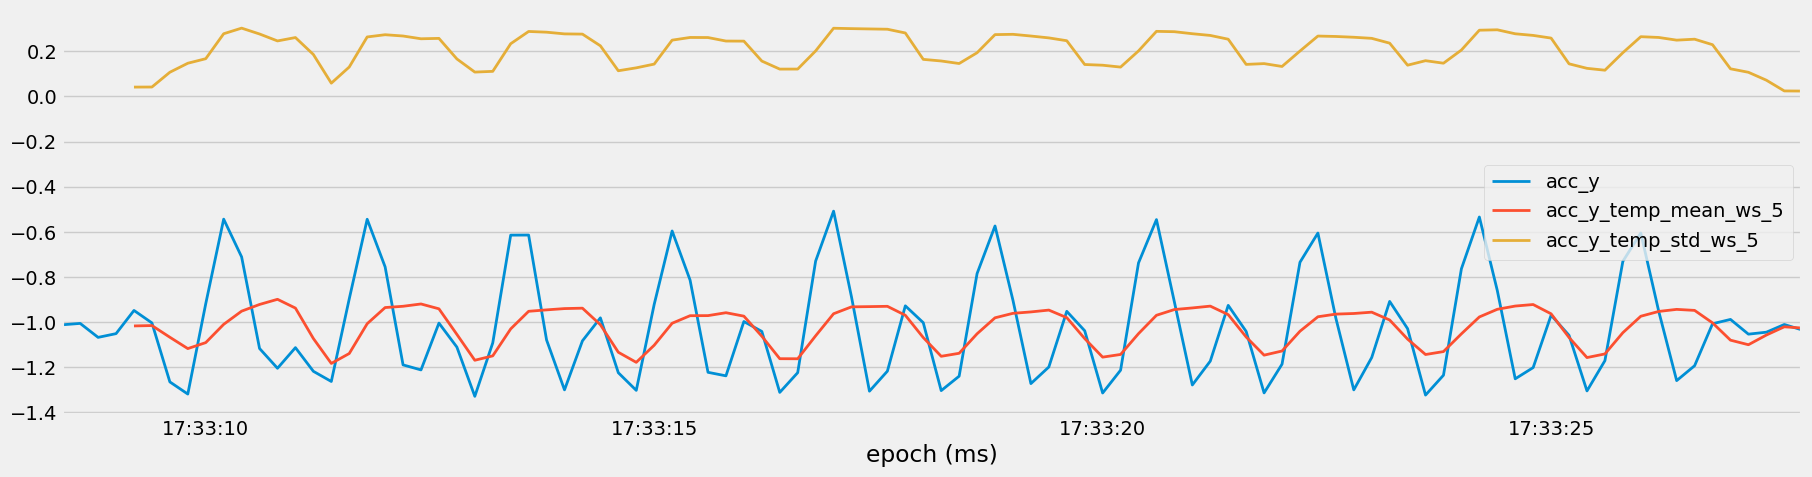

In [ ]:
subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]].plot()

<AxesSubplot: >

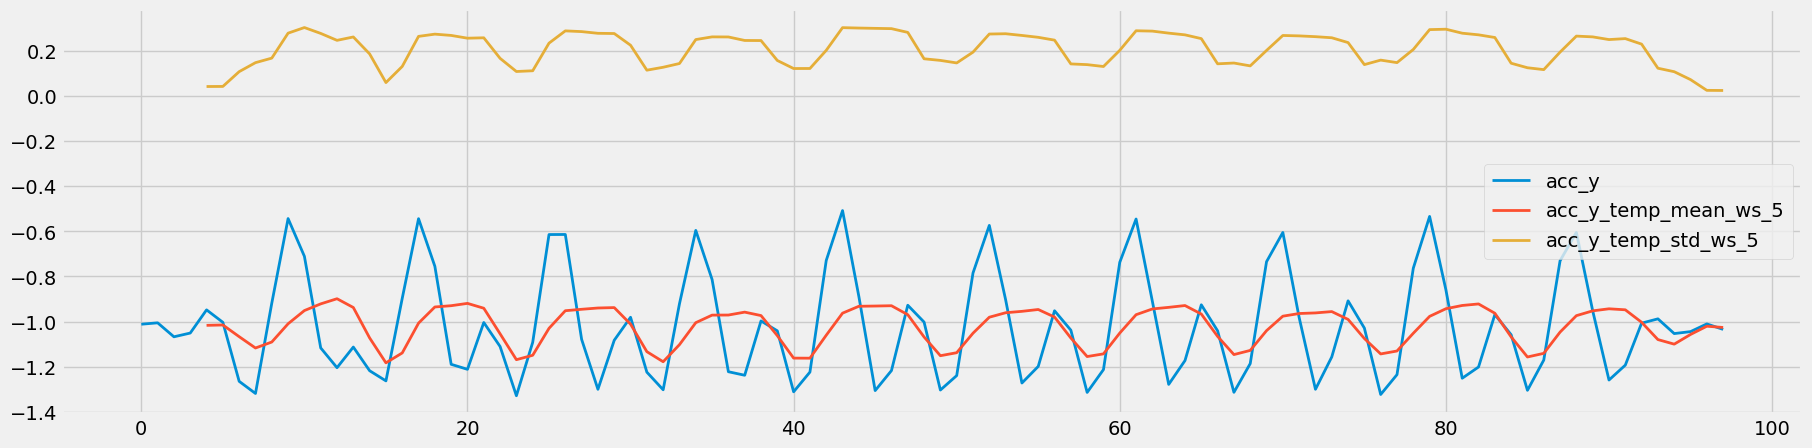

In [ ]:
subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]].reset_index(drop=True).plot()

<AxesSubplot: xlabel='epoch (ms)'>

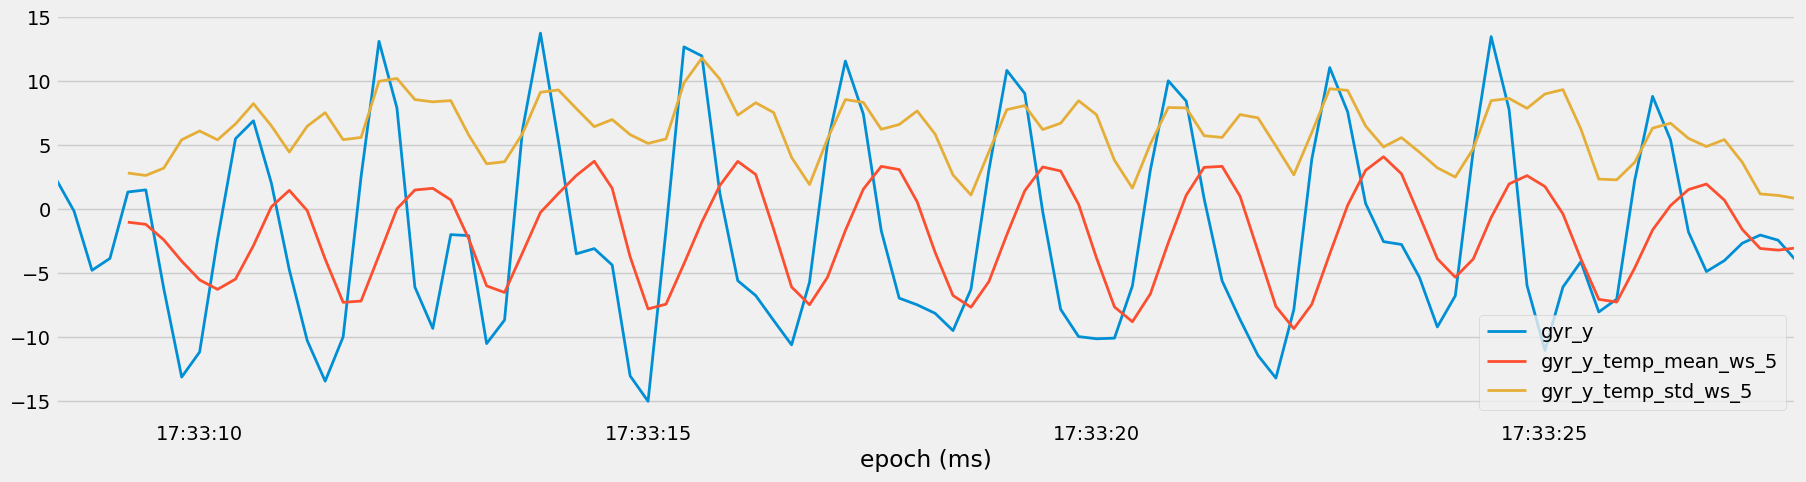

In [ ]:
subset[["gyr_y", "gyr_y_temp_mean_ws_5", "gyr_y_temp_std_ws_5"]].plot()

In [ ]:
from FrequencyAbstraction import FourierTransformation

In [ ]:
df_freq = df_temporal.copy().reset_index()

In [ ]:
df_freq

,epoch (ms),acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,...,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5
0,2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
9005,2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
9006,2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328
9007,2019-01-20 17:33:27.600,-1.010599,-0.060327,-0.050572,3.033517,-2.427441,0.279918,E,row,medium,...,2.006143,3.622861,-3.200450,1.071976,0.760034,0.532219,1.024177,0.024274,4.877383,2.369344


In [ ]:
FreqAbs = FourierTransformation()

In [ ]:
fs = int(1000 / 200)

In [ ]:
fs

5

In [ ]:
ws = int(2800 / 200)

In [ ]:
ws

14

In [ ]:
df_freq = FreqAbs.abstract_frequency(df_freq, ["acc_y"], ws, fs)

In [ ]:
df_freq

,epoch (ms),acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,...,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_14,acc_y_freq_0.357_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_y_freq_1.429_Hz_ws_14,acc_y_freq_1.786_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,acc_y_freq_2.5_Hz_ws_14
0,2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,...,-0.366246,0.080086,-15.086721,0.169773,1.260702,0.908251,0.370038,0.284737,0.272604,0.270130
9005,2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,...,-0.189618,0.098206,-15.605886,-0.499724,1.034515,-1.036798,0.960714,0.363849,0.279607,0.252243
9006,2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,...,0.083718,0.054012,-15.790817,-0.732594,0.519170,-1.087010,-0.032387,-0.036956,-0.056240,-0.063536
9007,2019-01-20 17:33:27.600,-1.010599,-0.060327,-0.050572,3.033517,-2.427441,0.279918,E,row,medium,...,0.116557,0.041741,-15.550088,-0.433942,0.006282,0.624310,-0.794175,-0.262326,-0.198431,-0.178484


In [ ]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   epoch (ms)                 9009 non-null   datetime64[ns]
 1   acc_y                      9009 non-null   float64       
 2   acc_z                      9009 non-null   float64       
 3   acc_x                      9009 non-null   float64       
 4   gyr_x                      9009 non-null   float64       
 5   gyr_y                      9009 non-null   float64       
 6   gyr_z                      9009 non-null   float64       
 7   participant                9009 non-null   object        
 8   label                      9009 non-null   object        
 9   category                   9009 non-null   object        
 10  set                        9009 non-null   int32         
 11  duration                   9009 non-null   float64       
 12  pca_1 

In [ ]:
subset = df_freq[df_freq["set"] == 15]

In [ ]:
subset

,epoch (ms),acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,...,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_14,acc_y_freq_0.357_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_y_freq_1.429_Hz_ws_14,acc_y_freq_1.786_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,acc_y_freq_2.5_Hz_ws_14
885,2019-01-11 15:53:53.800,0.962516,0.007055,-0.099643,0.164716,-2.753575,6.242292,A,ohp,medium,...,0.064767,0.109723,14.297956,1.341865,-0.319604,1.276248,-0.520126,-0.015718,0.035102,0.049635
886,2019-01-11 15:53:54.000,0.946646,0.018862,-0.071937,-2.848058,-1.211020,6.655810,A,ohp,medium,...,0.182945,0.067261,14.045085,0.757244,0.265694,1.118903,0.092223,0.200179,0.203666,0.201949
887,2019-01-11 15:53:54.200,0.978737,0.026108,-0.061562,5.875904,-1.366160,-1.619477,A,ohp,medium,...,0.148278,0.053186,13.708835,-0.012619,0.703048,-0.435764,0.788865,0.236535,0.160262,0.137065
888,2019-01-11 15:53:54.400,1.135153,-0.013110,-0.115936,18.998615,2.128656,-24.201525,A,ohp,medium,...,-0.098873,0.080175,13.719747,-0.434083,1.018719,-1.048598,0.077969,-0.105920,-0.135554,-0.144513
889,2019-01-11 15:53:54.600,1.202548,-0.074982,-0.229584,16.466453,9.944522,-42.614915,A,ohp,medium,...,-0.206183,0.069666,14.110575,-0.434361,0.910868,-0.102444,-0.856929,-0.336941,-0.268030,-0.247555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2019-01-11 15:54:14.800,1.033188,-0.254040,-0.298636,-30.907235,-4.458638,35.275418,A,ohp,medium,...,-0.117648,0.041215,13.516092,-0.413166,-0.729721,0.451136,-0.136499,-0.157162,-0.165014,-0.168117
991,2019-01-11 15:54:15.000,1.110085,-0.179122,-0.191570,-30.717679,-4.642763,31.341149,A,ohp,medium,...,-0.228251,0.062907,13.900910,0.512920,-0.990949,-0.593284,-0.115964,-0.231616,-0.218852,-0.216572
992,2019-01-11 15:54:15.200,1.081468,-0.087824,-0.092027,-11.502404,-6.389286,14.197682,A,ohp,medium,...,-0.214888,0.108830,14.302893,1.332729,-0.712266,-1.078404,-0.266095,-0.197032,-0.190905,-0.186221
993,2019-01-11 15:54:15.400,1.030509,-0.032990,-0.068072,3.912404,-2.429048,-0.154748,A,ohp,medium,...,-0.053463,0.086152,14.552968,1.748568,-0.196900,-0.397912,-0.256530,-0.098373,-0.076555,-0.065719


<AxesSubplot: >

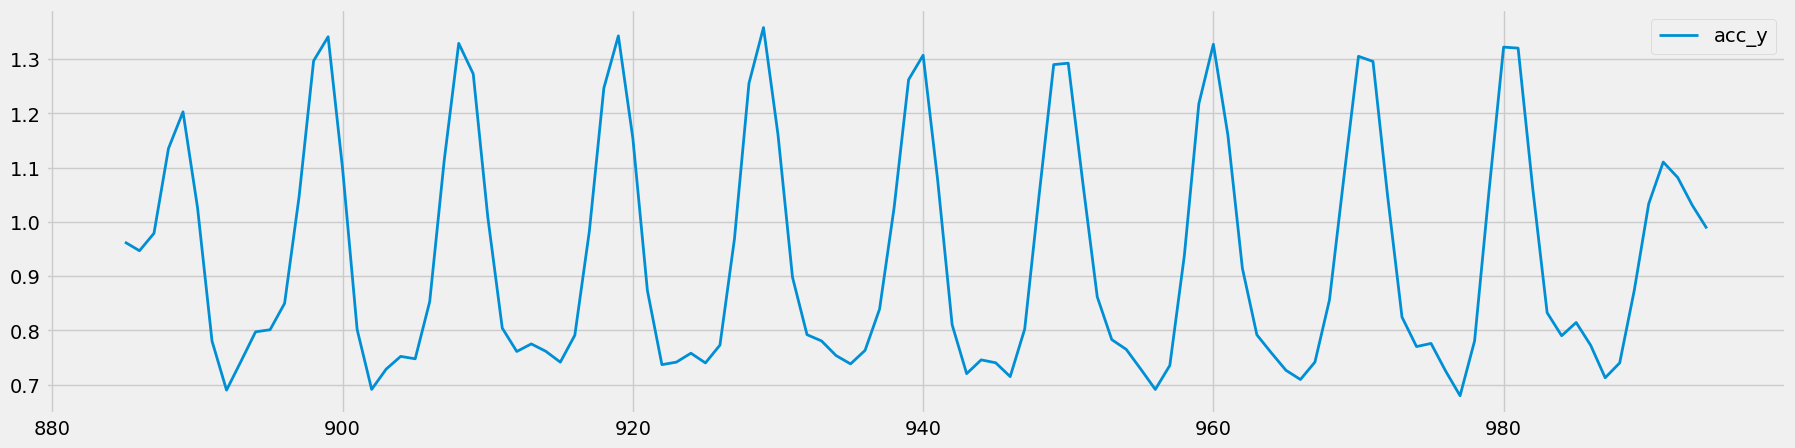

In [ ]:
subset[["acc_y"]].plot()

<AxesSubplot: >

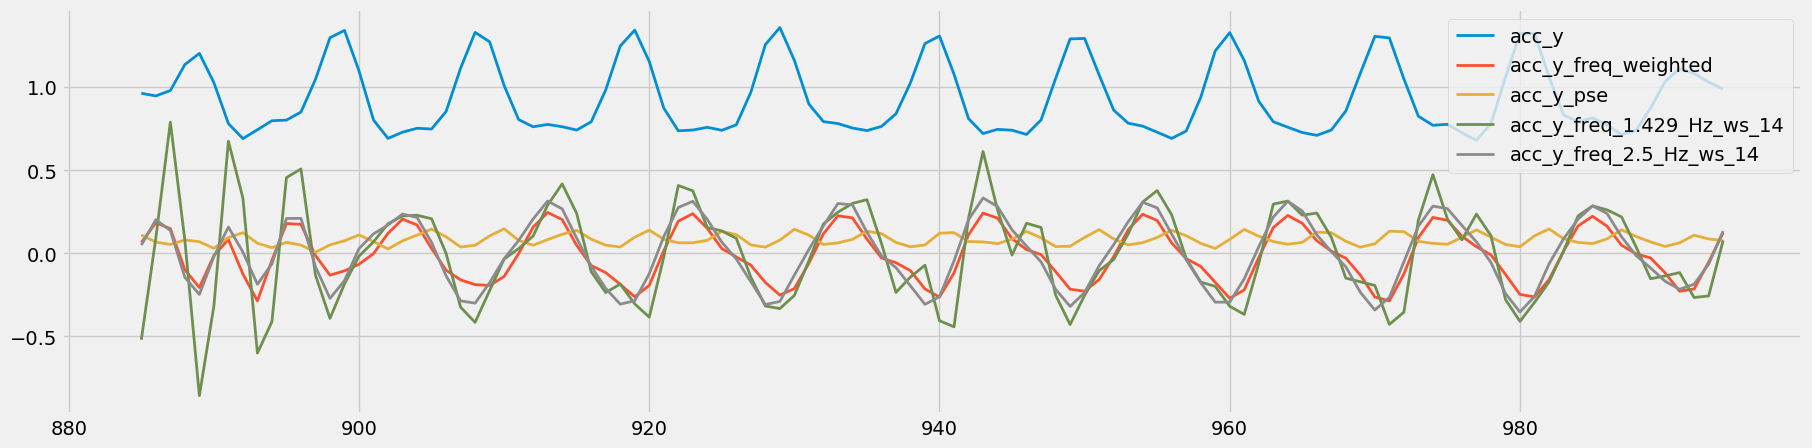

In [ ]:
subset[
    [
        "acc_y",
        "acc_y_freq_weighted",
        "acc_y_pse",
        "acc_y_freq_1.429_Hz_ws_14",
        "acc_y_freq_2.5_Hz_ws_14"
    ]
].plot()

In [ ]:
df_freq_list = []

In [ ]:
df_freq_list

[]

In [ ]:
for s in df_freq["set"].unique():
    print(f"Applying Fourier Transformation to set - {s}")
    
    subset = df_freq[df_freq["set"] == s].reset_index(drop=True).copy()
    subset = FreqAbs.abstract_frequency(subset, predictor_columns, ws, fs)
    
    df_freq_list.append(subset)

Applying Fourier Transformation to set - 30
Applying Fourier Transformation to set - 1
Applying Fourier Transformation to set - 31
Applying Fourier Transformation to set - 3
Applying Fourier Transformation to set - 9
Applying Fourier Transformation to set - 32
Applying Fourier Transformation to set - 10
Applying Fourier Transformation to set - 33
Applying Fourier Transformation to set - 11
Applying Fourier Transformation to set - 34
Applying Fourier Transformation to set - 35
Applying Fourier Transformation to set - 15
Applying Fourier Transformation to set - 36
Applying Fourier Transformation to set - 16
Applying Fourier Transformation to set - 37
Applying Fourier Transformation to set - 17
Applying Fourier Transformation to set - 27
Applying Fourier Transformation to set - 38
Applying Fourier Transformation to set - 28
Applying Fourier Transformation to set - 29
Applying Fourier Transformation to set - 6
Applying Fourier Transformation to set - 65
Applying Fourier Transformation to s

In [ ]:
df_freq = pd.concat(df_freq_list)

In [ ]:
df_freq

,epoch (ms),acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
0,2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
94,2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
95,2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361
96,2019-01-20 17:33:27.600,-1.010599,-0.060327,-0.050572,3.033517,-2.427441,0.279918,E,row,medium,...,0.011089,0.612936,240.957375,-72.505797,11.076672,-23.105359,59.718965,-28.820321,12.706694,-6.491219


In [ ]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_y                 9009 non-null   float64
 1   acc_z                 9009 non-null   float64
 2   acc_x                 9009 non-null   float64
 3   gyr_x                 9009 non-null   float64
 4   gyr_y                 9009 non-null   float64
 5   gyr_z                 9009 non-null   float64
 6   participant           9009 non-null   object 
 7   label                 9009 non-null   object 
 8   category              9009 non-null   object 
 9   set                   9009 non-null   int32  
 10  duration              9009 non-null   float64
 11  pca_1                 9009 non-null   float64
 12  pca_2                 9009 non-null   float64
 13  pca_3                 9009 non-null   float64
 14  acc_r                 

In [ ]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9009 entries, 0 to 97
Columns: 121 entries, epoch (ms) to gyr_r_freq_2.5_Hz_ws_14
dtypes: datetime64[ns](1), float64(116), int32(1), object(3)
memory usage: 8.4+ MB


In [ ]:
df_freq = pd.concat(df_freq_list).set_index("epoch (ms)", drop=True)

In [ ]:
df_freq

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


In [ ]:
df_freq.info

<bound method DataFrame.info of                             acc_y     acc_z     acc_x     gyr_x     gyr_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.977003 -0.071001  0.013503 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.973169 -0.066481  0.008515 -0.367396  0.439794   
2019-01-11 15:08:05.600  0.966879 -0.071895 -0.008450  4.320608 -2.083978   
2019-01-11 15:08:05.800  0.962244 -0.084774 -0.024359  4.737252 -3.456339   
2019-01-11 15:08:06.000  0.959572 -0.096776 -0.022092  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.988153 -0.062545 -0.043276  2.032956 -4.019557   
2019-01-20 17:33:27.200 -1.053448 -0.064530 -0.041403 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -1.044737 -0.065951 -0.048048 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -1.010599 -0.060327 -0.050572  3.033517 -2.427441   
2019-01-20 17:33:27.800 -1.035004 -0.059316 

In [ ]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Columns: 120 entries, acc_y to gyr_r_freq_2.5_Hz_ws_14
dtypes: float64(116), int32(1), object(3)
memory usage: 8.3+ MB


In [ ]:
df_freq.dropna()

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.200,0.854894,-0.094507,-0.075541,-17.787623,-7.152388,16.679304,B,bench,heavy,30,...,-1.091920,0.379916,264.105051,-31.509559,-20.512654,3.718167,-36.406994,-53.036189,16.624430,-6.428409
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.600,0.947898,-0.047164,-0.039468,1.731909,-0.126808,-3.356740,B,bench,heavy,30,...,-0.051046,0.608396,265.472278,-54.366043,-70.788251,-14.043211,32.170170,36.805962,-27.594837,9.354092
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


In [ ]:
df_freq = df_freq.dropna()

In [ ]:
df_freq[:]

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.200,0.854894,-0.094507,-0.075541,-17.787623,-7.152388,16.679304,B,bench,heavy,30,...,-1.091920,0.379916,264.105051,-31.509559,-20.512654,3.718167,-36.406994,-53.036189,16.624430,-6.428409
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.600,0.947898,-0.047164,-0.039468,1.731909,-0.126808,-3.356740,B,bench,heavy,30,...,-0.051046,0.608396,265.472278,-54.366043,-70.788251,-14.043211,32.170170,36.805962,-27.594837,9.354092
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


In [ ]:
df_freq[:2]

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.200,0.854894,-0.094507,-0.075541,-17.787623,-7.152388,16.679304,B,bench,heavy,30,...,-1.091920,0.379916,264.105051,-31.509559,-20.512654,3.718167,-36.406994,-53.036189,16.624430,-6.428409


In [ ]:
df_freq[::2]

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,row,medium,90,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


In [ ]:
df_freq = df_freq[::2]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cluster_columns = ["acc_x","acc_y","acc_z"]

In [ ]:
k_value = range(2,10)
inertias = []

In [ ]:
df_cluster = df_freq.copy()

In [ ]:
df_cluster

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,row,medium,90,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


In [ ]:
for k in k_value:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

In [ ]:
inertias

[888.2145379895424,
 513.7868949414761,
 315.9388838213685,
 234.300768527706,
 209.18733836503506,
 185.8822242692466,
 165.53928247652053,
 147.17977465890473]

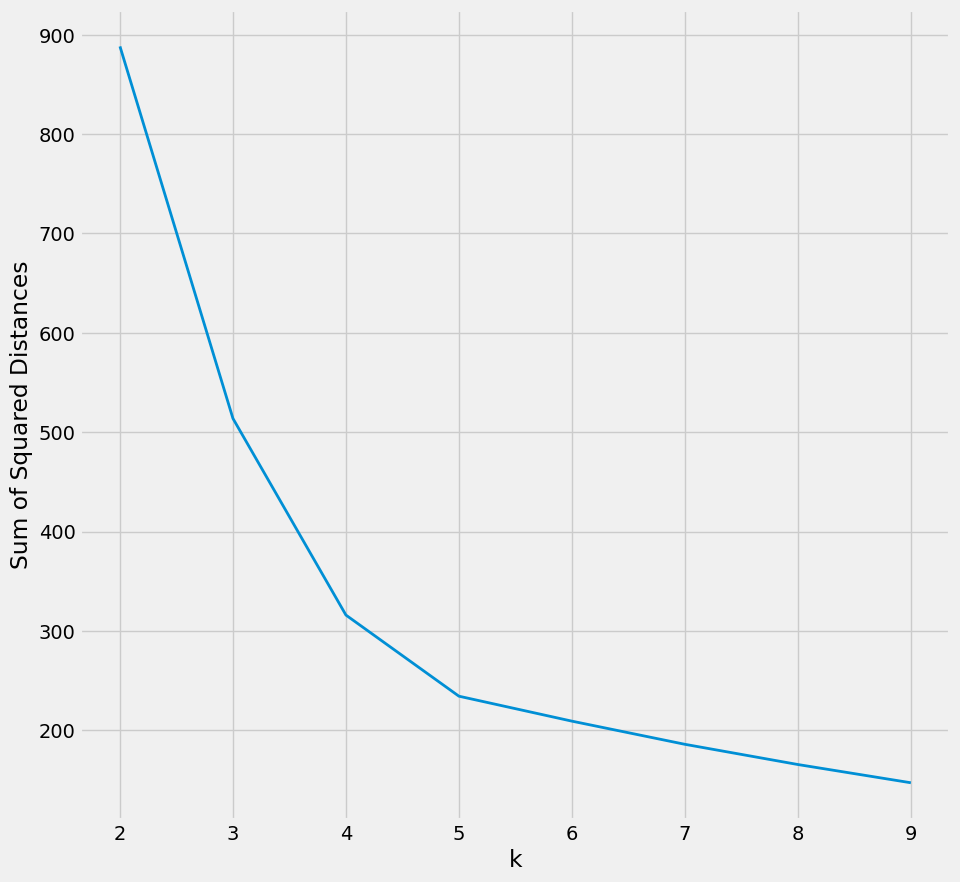

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_value, inertias)
plt.xlabel("k")
plt.ylabel("Sum of Squared Distances")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0)

In [ ]:
subset = df_cluster[cluster_columns]

In [ ]:
df_cluster["cluster"] = kmeans.fit_predict(subset)

In [ ]:
df_cluster

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


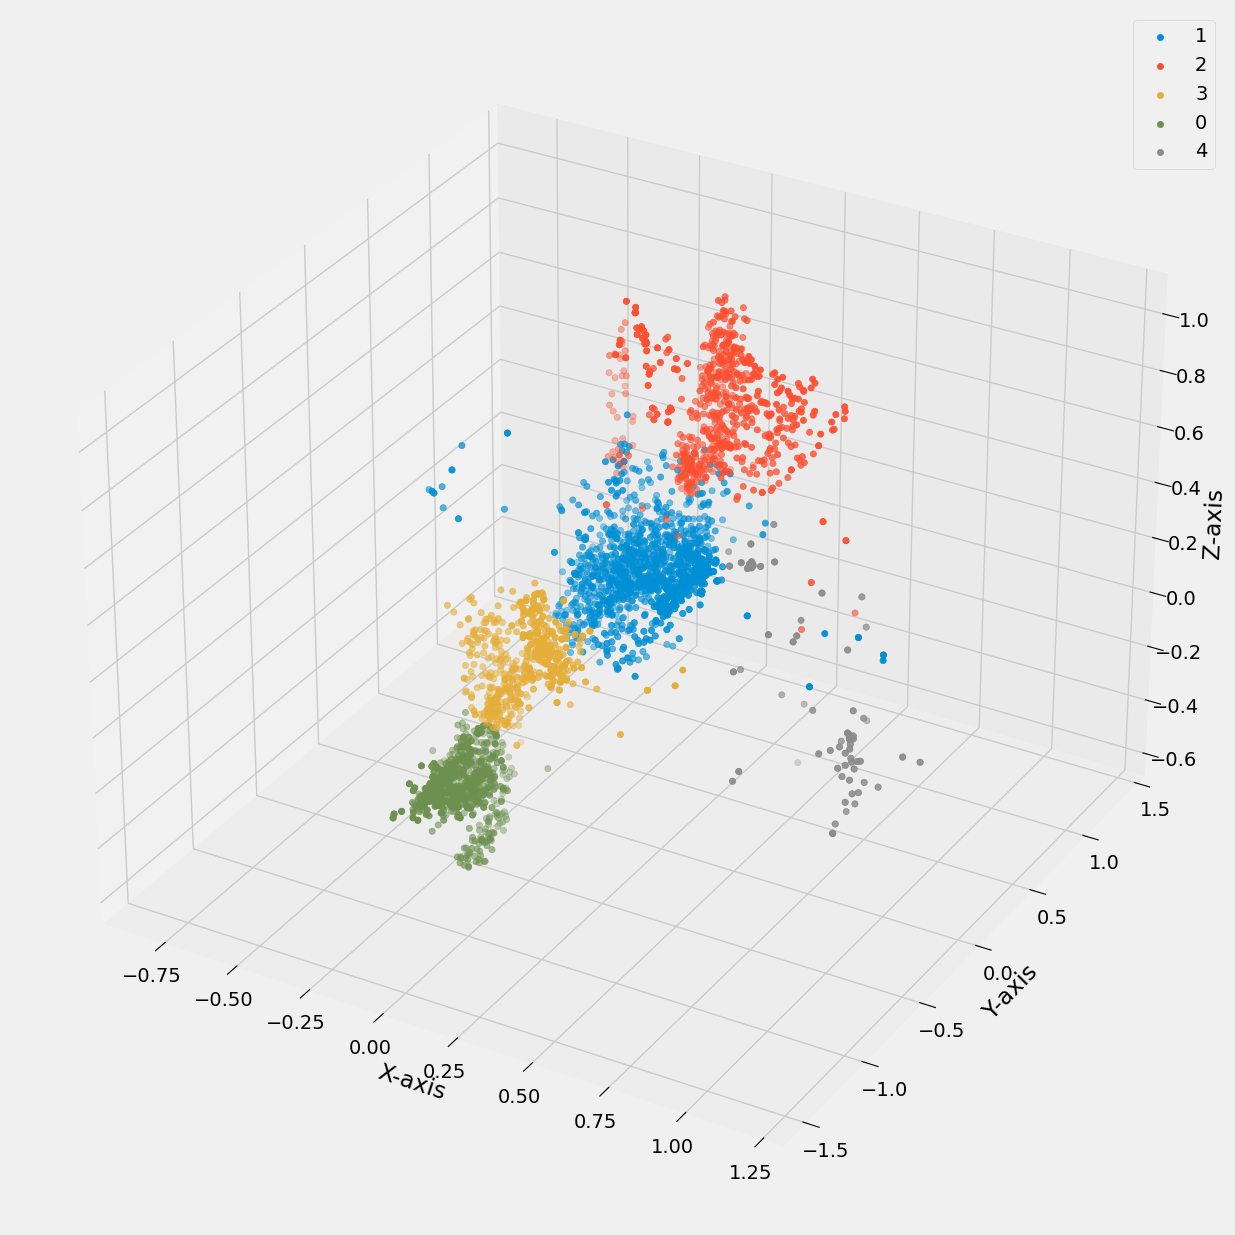

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")

for c in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"] == c]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=c)
    
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

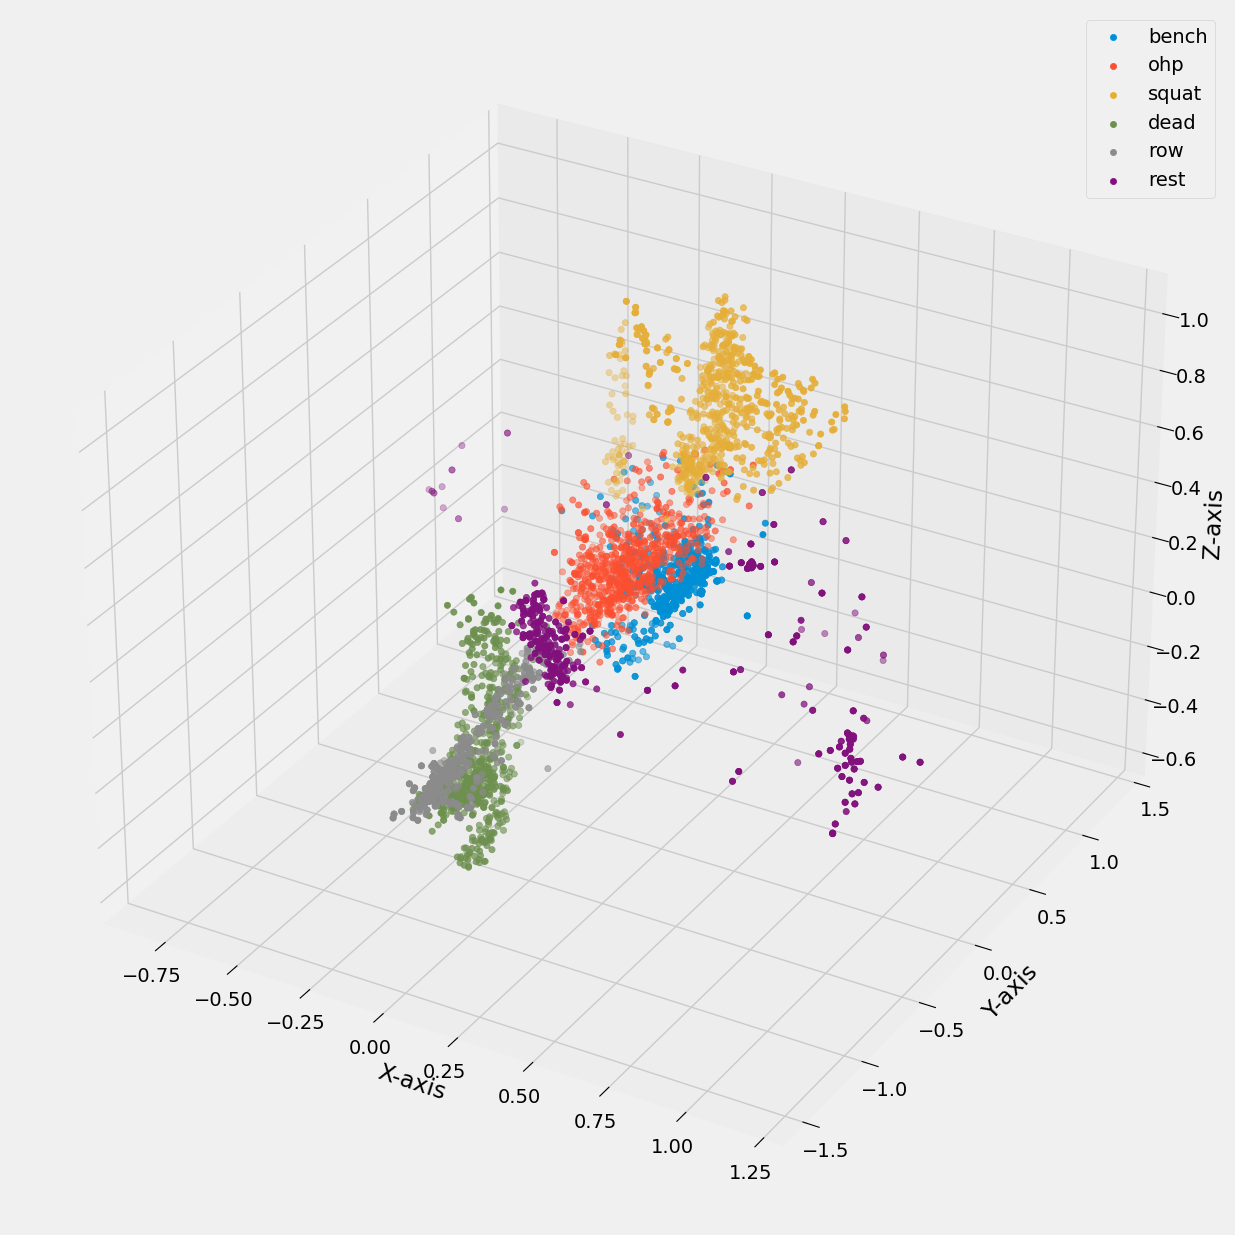

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")

for l in df_cluster["label"].unique():
    subset = df_cluster[df_cluster["label"] == l]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=l)
    
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

In [ ]:
df_cluster.drop(["duration"])

KeyError: "['duration'] not found in axis"

In [ ]:
df_cluster.drop(["duration"], axis = 1)

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [ ]:
df_cluster

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [ ]:
df_cluster = df_cluster.drop(["duration"], axis = 1)

In [ ]:
df_cluster

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [ ]:
df_cluster.to_pickle("../../data/interim/03_data_features.pkl")